                                                 STATE BANK ANLYSIS

# Project Overview

- The project focuses on analyzing a State Bank customer dataset to uncover valuable insights that can guide decision-making and enhance customer understanding.
- The goal is to use data analysis and visualization techniques to answer key questions about customer behavior, account usage, loan status, and more, leveraging Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn.

# Why I Chose This Project:

- Relevance to Real-World Applications: 
- Practical Skills:
- Exploratory Analysis:
- Visualization: 



# Insights

- Customer Demographics: Analysis revealed the distribution of customers by gender, age, and employment status, which can help target specific customer segments for marketing or service enhancements.
- Account Types and Income: By analyzing the income distribution across different account types, insights were generated on the preferences of different income groups.
- Loan Approvals: The loan approval rate by employment status or other factors can reveal how different customer characteristics impact loan eligibility.
- Financial Health: Visualizations like account balance distribution and monthly expenditure give insights into the financial health of the customers, helping the bank tailor financial products accordingly.

# Importting required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Load and Inspect the Dataset

In [3]:
#reading csv file using read_csv fun
df = pd.read_csv('state_bank.csv')

In [4]:
df.head()

,CustomerID,Age,Gender,Income,Education,AccountType,AccountBalance,LoanType,LoanAmount,InterestRate,...,BranchCode,State,City,CreditScore,OverdraftLimit,MonthlyExpenditure,EmploymentStatus,EmployerName,NumberOfTransactions,LastLoginDate
0,1,56,Female,117661.0,High School,Savings,73902.0,Personal,62336.0,6.48,...,BR004,Illinois,Miami,377.0,5553.0,5549.0,Self-Employed,Company A,82,2023-07-06
1,2,69,Male,103986.0,NaN,Checking,445664.0,Home,135395.0,9.29,...,BR002,Texas,New York City,497.0,41832.0,30000.0,Unemployed,Company A,7,2023-01-10
2,3,46,Male,96272.0,Bachelor,Fixed Deposit,164991.0,Education,517543.0,12.64,...,BR003,New York,Los Angeles,410.0,9645.0,47849.0,NaN,NaN,31,2023-05-01
3,4,32,Male,103930.0,NaN,Fixed Deposit,203258.0,Home,1770342.0,7.45,...,BR002,Florida,Miami,749.0,32643.0,29841.0,Student,Company B,65,2023-10-16
4,5,60,Male,124444.0,NaN,Savings,386134.0,Education,1324585.0,10.88,...,BR002,Texas,Los Angeles,540.0,28601.0,29897.0,NaN,Company D,95,2023-06-14


In [5]:
df.tail()

,CustomerID,Age,Gender,Income,Education,AccountType,AccountBalance,LoanType,LoanAmount,InterestRate,...,BranchCode,State,City,CreditScore,OverdraftLimit,MonthlyExpenditure,EmploymentStatus,EmployerName,NumberOfTransactions,LastLoginDate
995,996,60,Male,139052.0,Bachelor,Checking,434083.0,Education,257500.0,8.05,...,BR001,Florida,Chicago,456.0,2522.0,14394.0,Student,Company B,85,2023-10-02
996,997,64,Female,140695.0,Bachelor,Checking,363908.0,Education,1144167.0,6.86,...,BR004,Florida,Miami,470.0,21835.0,28823.0,Employed,Company D,13,2023-11-19
997,998,62,Female,76532.0,NaN,Fixed Deposit,485607.0,NaN,66304.0,10.08,...,BR001,Illinois,Houston,512.0,45168.0,25297.0,Self-Employed,NaN,55,2023-07-02
998,999,35,NaN,34939.0,Master,Savings,177111.0,Personal,1717108.0,7.16,...,BR004,California,Miami,381.0,27420.0,20906.0,Student,Company A,17,2023-03-02
999,1000,55,Male,70729.0,High School,Savings,342609.0,Education,1373921.0,6.48,...,BR001,Texas,Los Angeles,645.0,37748.0,9547.0,Student,Company B,75,2023-03-04


In [6]:
# Check the structure and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1000 non-null   int64  
 1   Age                   1000 non-null   int64  
 2   Gender                905 non-null    object 
 3   Income                997 non-null    float64
 4   Education             793 non-null    object 
 5   AccountType           954 non-null    object 
 6   AccountBalance        999 non-null    float64
 7   LoanType              895 non-null    object 
 8   LoanAmount            1000 non-null   float64
 9   InterestRate          999 non-null    float64
 10  LoanStatus            897 non-null    object 
 11  BranchCode            906 non-null    object 
 12  State                 908 non-null    object 
 13  City                  910 non-null    object 
 14  CreditScore           998 non-null    float64
 15  OverdraftLimit        

In [7]:
# Check summary statistics
df.describe(include='all')

,CustomerID,Age,Gender,Income,Education,AccountType,AccountBalance,LoanType,LoanAmount,InterestRate,...,BranchCode,State,City,CreditScore,OverdraftLimit,MonthlyExpenditure,EmploymentStatus,EmployerName,NumberOfTransactions,LastLoginDate
count,1000.000000,1000.00000,905,997.000000,793,954,999.000000,895,1.000000e+03,999.000000,...,906,908,910,998.000000,999.000000,999.000000,817,797,1000.000000,1000
unique,NaN,NaN,2,NaN,4,3,NaN,3,NaN,NaN,...,5,5,5,NaN,NaN,NaN,4,4,NaN,350
top,NaN,NaN,Female,NaN,Master,Savings,NaN,Home,NaN,NaN,...,BR003,Texas,Miami,NaN,NaN,NaN,Unemployed,Company A,NaN,2023-10-14
freq,NaN,NaN,457,NaN,211,417,NaN,320,NaN,NaN,...,209,205,207,NaN,NaN,NaN,227,214,NaN,10
mean,500.500000,43.81900,NaN,83907.325978,NaN,NaN,254006.514515,NaN,1.017945e+06,9.843634,...,NaN,NaN,NaN,565.912826,25730.165165,25364.870871,NaN,NaN,49.694000,NaN
std,288.819436,14.99103,NaN,38942.759369,NaN,NaN,143393.319717,NaN,5.744754e+05,2.907481,...,NaN,NaN,NaN,156.440392,14330.271641,14224.087939,NaN,NaN,28.231815,NaN
min,1.000000,18.00000,NaN,20162.000000,NaN,NaN,1515.000000,NaN,5.080100e+04,5.000000,...,NaN,NaN,NaN,301.000000,1018.000000,1057.000000,NaN,NaN,1.000000,NaN
25%,250.750000,31.00000,NaN,48044.000000,NaN,NaN,131196.000000,NaN,5.175430e+05,7.300000,...,NaN,NaN,NaN,437.000000,13568.500000,12809.000000,NaN,NaN,27.000000,NaN
50%,500.500000,44.00000,NaN,82946.000000,NaN,NaN,263048.000000,NaN,9.755810e+05,9.770000,...,NaN,NaN,NaN,555.000000,26046.000000,25117.000000,NaN,NaN,48.500000,NaN
75%,750.250000,56.00000,NaN,117756.000000,NaN,NaN,377718.500000,NaN,1.530446e+06,12.095000,...,NaN,NaN,NaN,706.750000,38180.000000,37158.000000,NaN,NaN,75.000000,NaN


# 2. Handle Missing Values

In [8]:
# checking missing values
df.isnull().sum()

CustomerID                0
Age                       0
Gender                   95
Income                    3
Education               207
AccountType              46
AccountBalance            1
LoanType                105
LoanAmount                0
InterestRate              1
LoanStatus              103
BranchCode               94
State                    92
City                     90
CreditScore               2
OverdraftLimit            1
MonthlyExpenditure        1
EmploymentStatus        183
EmployerName            203
NumberOfTransactions      0
LastLoginDate             0
dtype: int64

In [9]:
#For categorical columns (e.g., Gender, Education, LoanType, EmploymentStatus):
#Fill missing values with the mode (most frequent value).

# Fill categorical columns with the mode
categorical_columns = ['Gender', 'Education', 'AccountType', 'LoanType', 'LoanStatus', 'EmploymentStatus', 'State', 'City']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
                                   

In [10]:
#For numerical columns (e.g., Income, CreditScore, OverdraftLimit):
#Fill missing values with the median or mean, depending on the data distribution.

# Fill numerical columns with the median
numerical_columns = ['Income', 'AccountBalance', 'LoanAmount', 'InterestRate', 'CreditScore', 'OverdraftLimit', 'MonthlyExpenditure']
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)


In [11]:
#For essential columns (e.g., LoanStatus, BranchCode):
#Drop rows where these fields are missing if they are critical for analysis.

# Drop rows where essential columns are missing
df.dropna(subset=['BranchCode'], inplace=True)

# 3. Handle Duplicates

In [12]:
df.duplicated().sum()

np.int64(0)

# 4.Display Data Types

In [13]:
#decriptive information about numerical col
df.describe()

,CustomerID,Age,Income,AccountBalance,LoanAmount,InterestRate,CreditScore,OverdraftLimit,MonthlyExpenditure,NumberOfTransactions
count,906.000000,906.000000,906.000000,906.000000,9.060000e+02,906.000000,906.000000,906.000000,906.000000,906.000000
mean,498.827815,43.831126,84280.286976,251935.990066,1.014088e+06,9.795695,566.291391,25702.924945,25221.006623,49.227373
std,287.353405,15.049868,38987.402011,142523.122871,5.742947e+05,2.925513,156.628113,14353.257141,14161.234852,28.222540
min,1.000000,18.000000,20162.000000,1515.000000,5.080100e+04,5.000000,301.000000,1018.000000,1057.000000,1.000000
25%,250.250000,31.000000,47729.000000,128766.500000,5.165160e+05,7.200000,436.000000,13363.000000,12809.000000,26.000000
50%,499.500000,44.000000,83758.000000,261819.000000,9.722715e+05,9.665000,560.000000,26046.000000,25104.000000,48.000000
75%,747.750000,56.000000,117732.250000,371432.500000,1.530986e+06,12.090000,707.000000,38180.000000,37091.750000,74.750000
max,1000.000000,69.000000,149951.000000,499909.000000,1.995909e+06,14.970000,847.000000,49985.000000,49960.000000,99.000000


In [14]:
#decriptive information about categorical col
df.describe(include ='object')

,Gender,Education,AccountType,LoanType,LoanStatus,BranchCode,State,City,EmploymentStatus,EmployerName,LastLoginDate
count,906,906,906,906,906,906,906,906,906,723,906
unique,2,4,3,3,2,5,5,5,4,4,339
top,Female,Master,Savings,Home,Rejected,BR003,Texas,Houston,Unemployed,Company A,2023-10-14
freq,501,381,423,389,503,209,271,277,365,193,10


# 5. Validate and Export Cleaned Data

In [15]:
# Final inspection
df.info()
df.describe()

# Save cleaned dataset
df.to_csv('state_bank_cleaned.csv', index=False)
print("Cleaned data saved as 'state_bank_cleaned.csv'")


<class 'pandas.core.frame.DataFrame'>
Index: 906 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            906 non-null    int64  
 1   Age                   906 non-null    int64  
 2   Gender                906 non-null    object 
 3   Income                906 non-null    float64
 4   Education             906 non-null    object 
 5   AccountType           906 non-null    object 
 6   AccountBalance        906 non-null    float64
 7   LoanType              906 non-null    object 
 8   LoanAmount            906 non-null    float64
 9   InterestRate          906 non-null    float64
 10  LoanStatus            906 non-null    object 
 11  BranchCode            906 non-null    object 
 12  State                 906 non-null    object 
 13  City                  906 non-null    object 
 14  CreditScore           906 non-null    float64
 15  OverdraftLimit        906 no

# 1. Customer Demographics Analysis

# Question 1: What is the gender distribution of the bank's customers?


In [16]:
# Gender distribution
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)

Gender
Female    501
Male      405
Name: count, dtype: int64


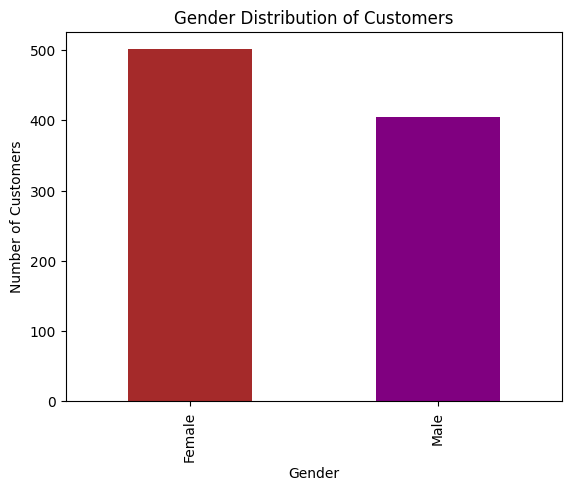

In [17]:
# Visualization
gender_distribution.plot(kind='bar', color=['brown', 'purple'])
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

# Question 2: What is the average age of the bank's customers?

In [18]:
# Average age
average_age = df['Age'].mean()
print(f"The average age of customers is {average_age:.2f} years.")

The average age of customers is 43.83 years.


# 2. Financial Analysis

# Question 3: What is the average account balance for customers, and how does it vary by account type?

In [19]:
# Average account balance by account type
account_balance_by_type = df.groupby('AccountType')['AccountBalance'].mean()
print(account_balance_by_type)


AccountType
Checking         251828.818966
Fixed Deposit    246103.340741
Savings          253885.643026
Name: AccountBalance, dtype: float64


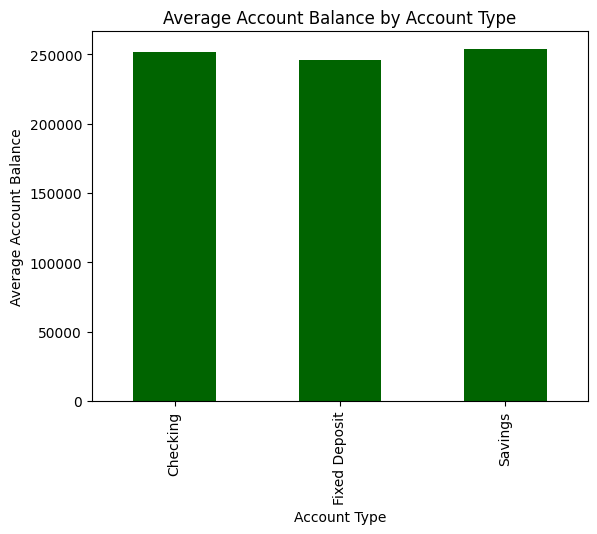

In [20]:
# Visualization
account_balance_by_type.plot(kind='bar', color='darkgreen')
plt.title('Average Account Balance by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Average Account Balance')
plt.show()

# 3. Loan Analysis

# Question 4: What is the average loan amount, and how does it vary by loan type?

In [21]:
# Average loan amount by loan type
average_loan_by_type = df.groupby('LoanType')['LoanAmount'].mean()
print(average_loan_by_type)

LoanType
Education    1.001090e+06
Home         9.848777e+05
Personal     1.072847e+06
Name: LoanAmount, dtype: float64


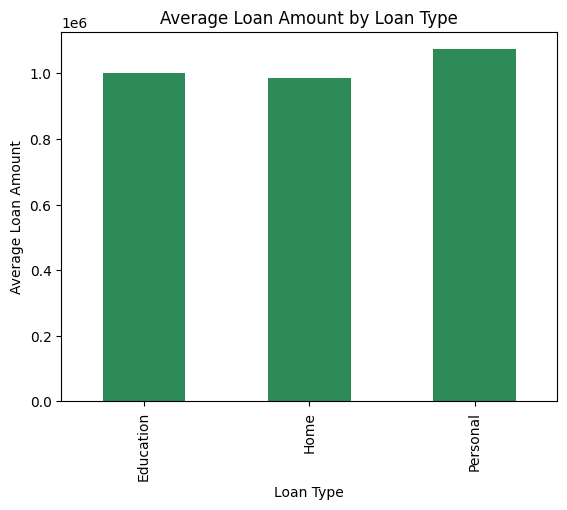

In [22]:
# Visualization
average_loan_by_type.plot(kind='bar', color='seagreen')
plt.title('Average Loan Amount by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Average Loan Amount')
plt.show()

# Question 5: What percentage of loans are approved versus rejected?

In [23]:
# Loan status distribution
loan_status_distribution = df['LoanStatus'].value_counts(normalize=True) * 100
print(loan_status_distribution)


LoanStatus
Rejected    55.518764
Approved    44.481236
Name: proportion, dtype: float64


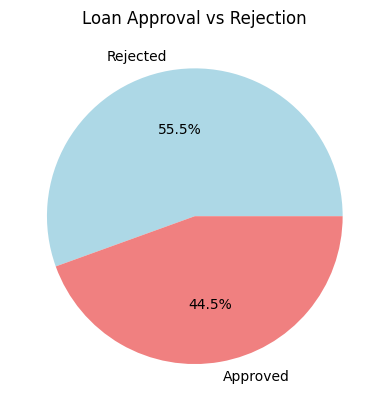

In [24]:
# Visualization
loan_status_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])#1.1f is used for format the number with one decimal place
plt.title('Loan Approval vs Rejection')
plt.ylabel('')
plt.show()

# 4. Credit Analysis

# Question 6: What is the distribution of credit scores across customers?

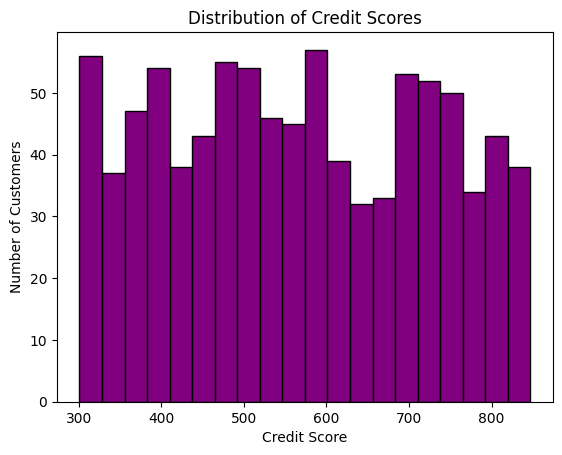

In [25]:
# Histogram of credit scores
df['CreditScore'].plot(kind='hist', bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.show()

# Question 7: How does the credit score affect loan approval?

In [26]:
# Average credit score by loan status
average_credit_score_by_status = df.groupby('LoanStatus')['CreditScore'].mean()
print(average_credit_score_by_status)


LoanStatus
Approved    568.885856
Rejected    564.212724
Name: CreditScore, dtype: float64


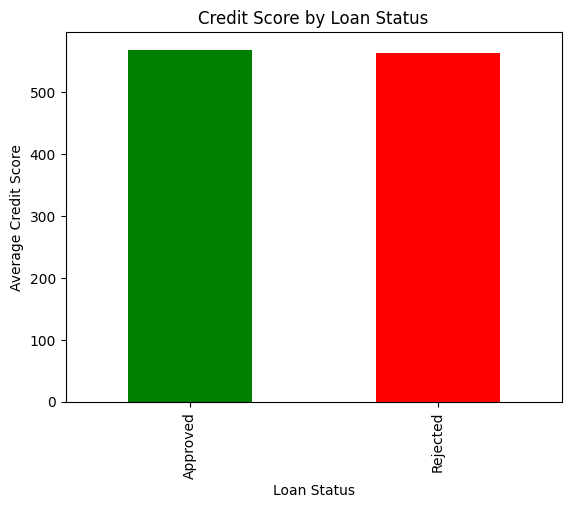

In [27]:
# Visualization
average_credit_score_by_status.plot(kind='bar', color=['green', 'red'])
plt.title('Credit Score by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Credit Score')
plt.show()

# 5. Transaction Behavior

# Question 8: What is the average number of transactions made by customers across different account types?

In [28]:
# Average transactions by account type
average_transactions_by_type = df.groupby('AccountType')['NumberOfTransactions'].mean()
print(average_transactions_by_type)


AccountType
Checking         48.109195
Fixed Deposit    53.866667
Savings          48.666667
Name: NumberOfTransactions, dtype: float64


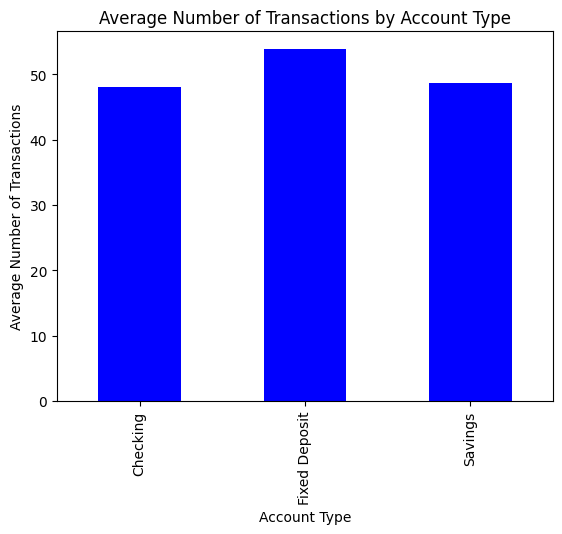

In [29]:
# Visualization
average_transactions_by_type.plot(kind='bar', color='blue')
plt.title('Average Number of Transactions by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Average Number of Transactions')
plt.show()

# 6. Time-Based Analysis

# Question 9: What is the distribution of customer logins by month?

In [30]:
# Extract months and count logins
df['LastLoginDate'] = pd.to_datetime(df['LastLoginDate'])
df['Month'] = df['LastLoginDate'].dt.month
logins_by_month = df['Month'].value_counts().sort_index()
print(logins_by_month)


Month
1     86
2     74
3     77
4     67
5     86
6     77
7     66
8     65
9     70
10    82
11    86
12    70
Name: count, dtype: int64


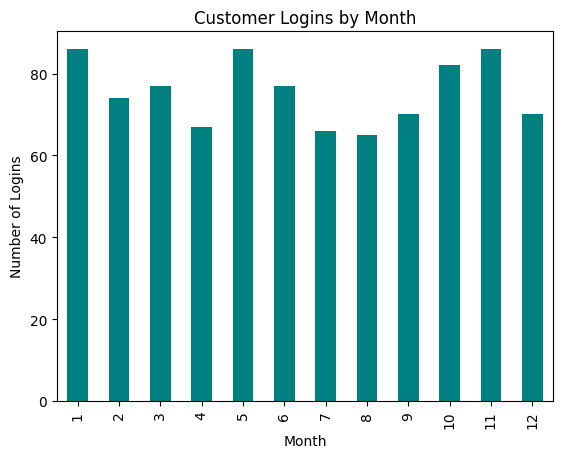

In [31]:
# Visualization
logins_by_month.plot(kind='bar', color='teal')
plt.title('Customer Logins by Month')
plt.xlabel('Month')
plt.ylabel('Number of Logins')
plt.show()

# Question 10: How does the number of transactions vary by account type?

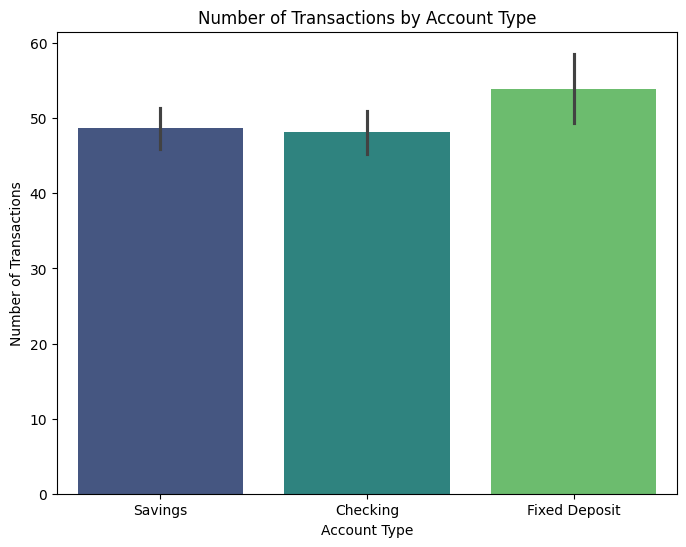

In [32]:
# Number of transactions by account type
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='AccountType', y='NumberOfTransactions', palette='viridis')
plt.title('Number of Transactions by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Number of Transactions')
plt.show()

# Question 11: How does monthly expenditure differ across different employment statuses?

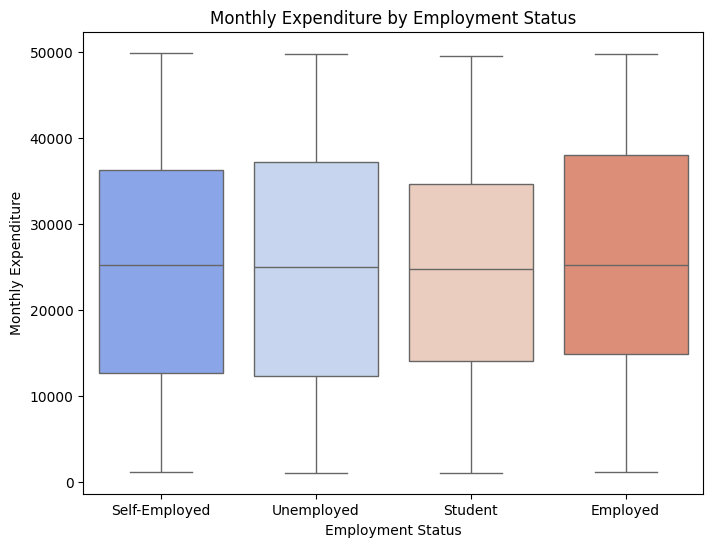

In [33]:
# Monthly expenditure by employment status boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='EmploymentStatus', y='MonthlyExpenditure', palette='coolwarm')
plt.title('Monthly Expenditure by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Monthly Expenditure')
plt.show()

# Question 12: Is there any correlation between customer age and the loan amount they have?

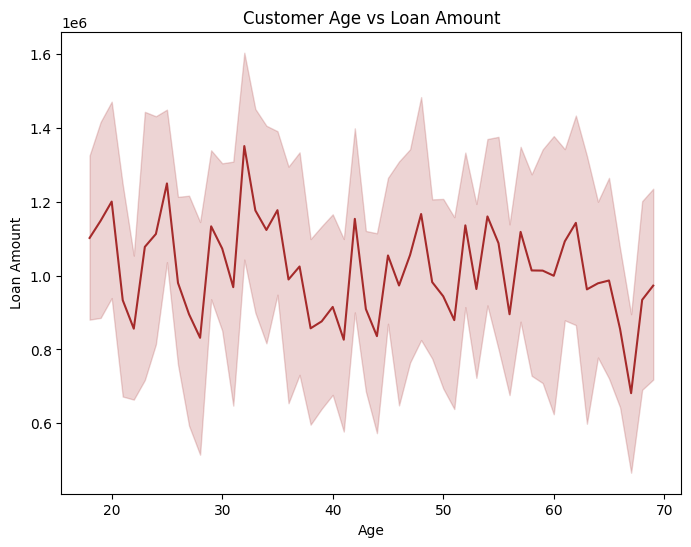

In [34]:
# Age vs loan amount scatter plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Age', y='LoanAmount', color='brown')
plt.title('Customer Age vs Loan Amount')
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.show()

# Question 13: What is the distribution of credit scores among customers?

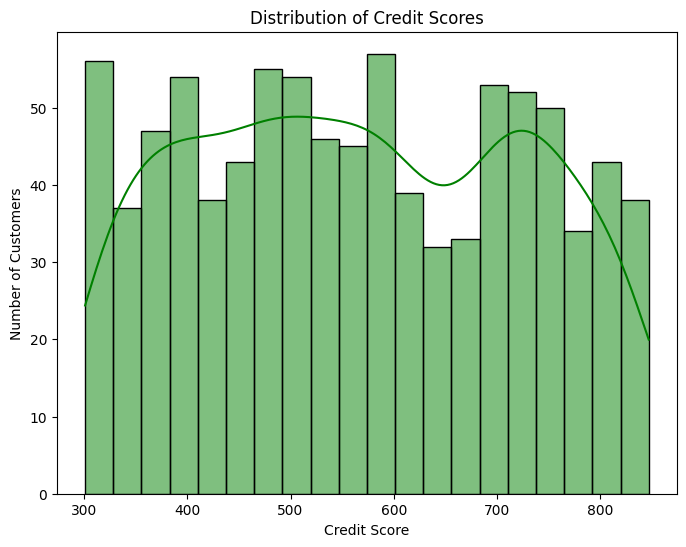

In [35]:
# Credit score distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(df['CreditScore'], bins=20, kde=True, color='green')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.show()

# Question 14: How does customer income vary across different loan amounts?

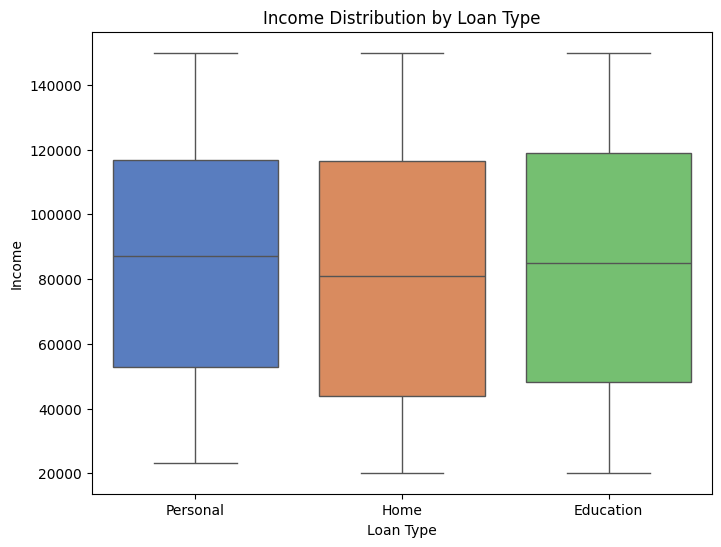

In [36]:
# Income vs loan amount boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='LoanType', y='Income', palette='muted')
plt.title('Income Distribution by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Income')
plt.show()

# Question 15: Is there any correlation between loan amount and interest rate?

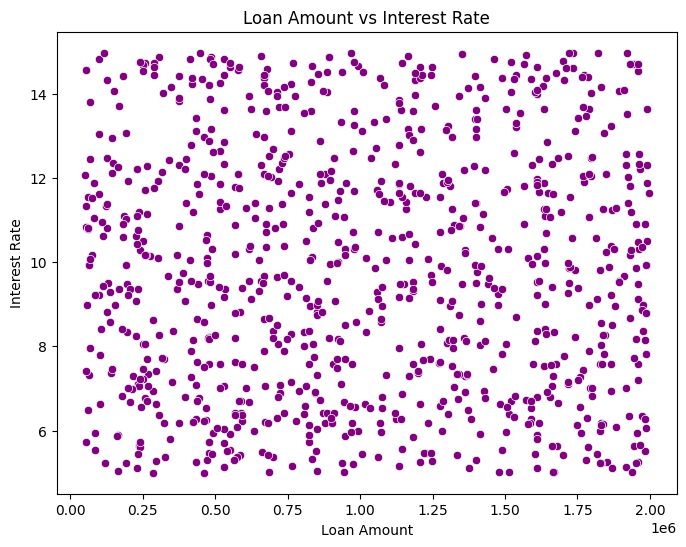

In [37]:
# Loan amount vs interest rate scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='LoanAmount', y='InterestRate', color='purple')
plt.title('Loan Amount vs Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

# Question 16: How is the account balance distributed among customers?

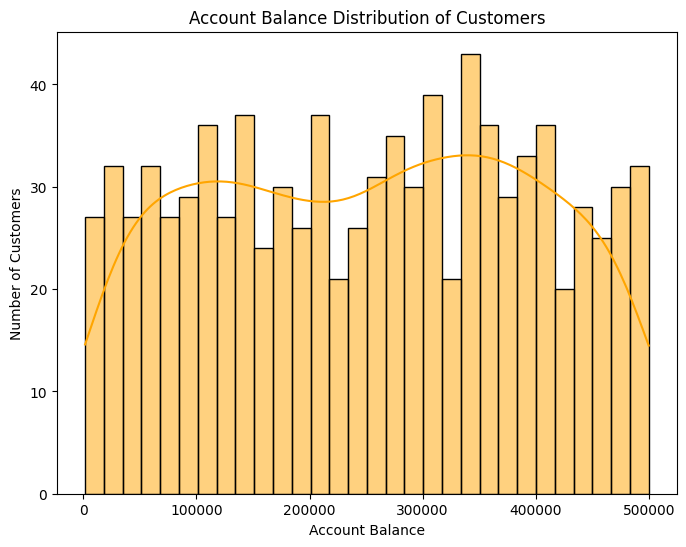

In [38]:
# Account balance distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(df['AccountBalance'], bins=30, kde=True, color='orange')
plt.title('Account Balance Distribution of Customers')
plt.xlabel('Account Balance')
plt.ylabel('Number of Customers')
plt.show()

# Question 17: What is the age distribution of customers?

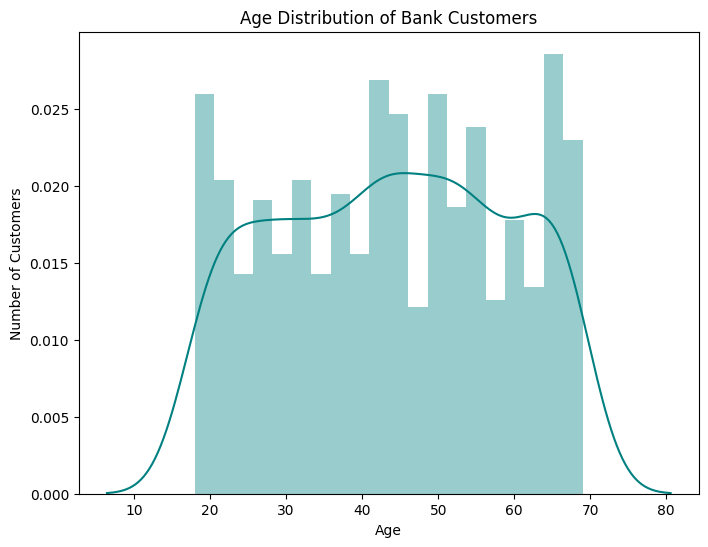

In [39]:
# Age distribution plot
plt.figure(figsize=(8, 6))
sns.distplot(df['Age'], bins=20, kde=True, color='teal')
plt.title('Age Distribution of Bank Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# Question 18: What is the distribution of loan approvals versus rejections?

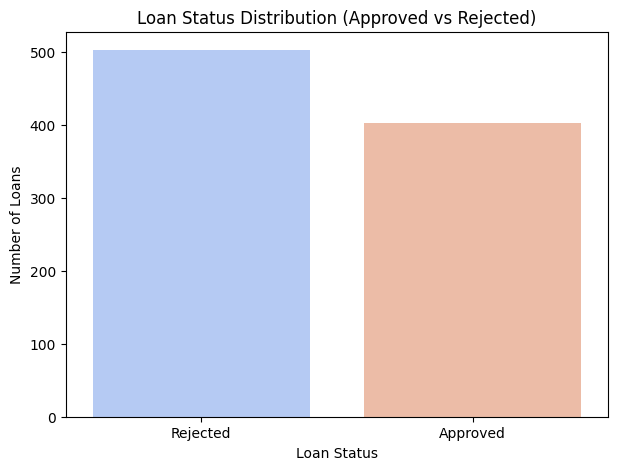

In [40]:
# Loan status distribution plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='LoanStatus', palette='coolwarm')
plt.title('Loan Status Distribution (Approved vs Rejected)')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.show()

# Question 19: How does the average income differ across different account types?

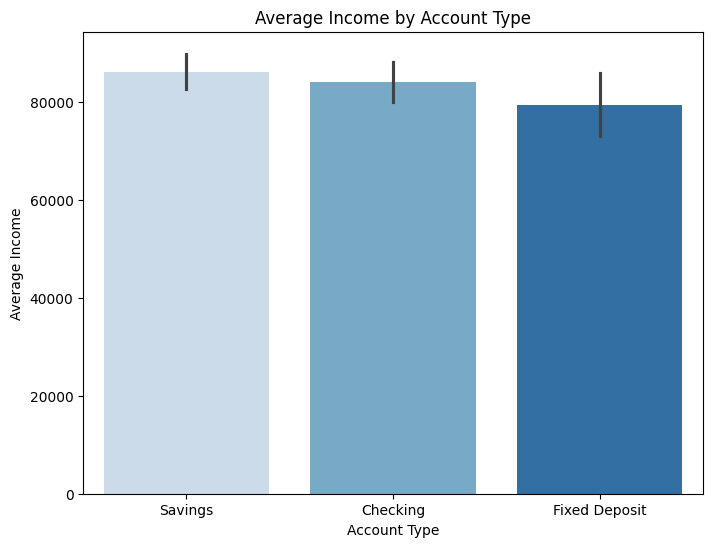

In [41]:
# Average income by account type
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='AccountType', y='Income', palette='Blues')
plt.title('Average Income by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Average Income')
plt.show()

# Question 20 : What is the gender distribution of the bank's customers?

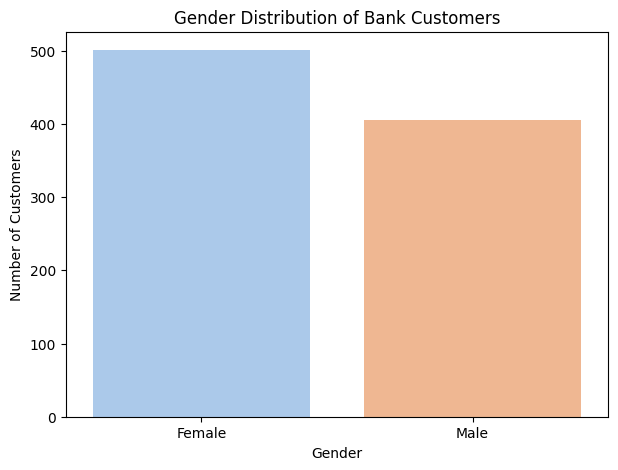

In [42]:
# Gender distribution plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution of Bank Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

In [43]:
# Why It's Useful

- Customer Segmentation: Helps identify different customer segments, allowing the bank to offer personalized products.
- Loan Strategy: Provides insights into loan approval trends, guiding the bank’s loan policies and risk management.
- Financial Planning: Understanding customer income and expenditure patterns can help design more effective financial services and products.

# What Could Be Added

- Predictive Analytics: Using machine learning models (e.g., decision trees, regression) to predict loan approvals, customer churn, or other business outcomes could add more value.
- Time-Series Analysis: If data includes transaction history over time, we could forecast trends like future loan demand or account balance growth.
- Geographical Insights: Mapping customer data by region could identify patterns in service usage across different locations.

# Conclusion

. This project is a comprehensive exploration of banking data that provides actionable insights through data cleaning, analysis, and visualization. By understanding customer behavior and financial health, the bank can make data-driven decisions to improve services, optimize product offerings, and enhance customer satisfaction.

. The project demonstrates how effective data analysis can be when applied to real-world datasets.

In [44]:
df.head(10)

,CustomerID,Age,Gender,Income,Education,AccountType,AccountBalance,LoanType,LoanAmount,InterestRate,...,State,City,CreditScore,OverdraftLimit,MonthlyExpenditure,EmploymentStatus,EmployerName,NumberOfTransactions,LastLoginDate,Month
0,1,56,Female,117661.0,High School,Savings,73902.0,Personal,62336.0,6.48,...,Illinois,Miami,377.0,5553.0,5549.0,Self-Employed,Company A,82,2023-07-06,7
1,2,69,Male,103986.0,Master,Checking,445664.0,Home,135395.0,9.29,...,Texas,New York City,497.0,41832.0,30000.0,Unemployed,Company A,7,2023-01-10,1
2,3,46,Male,96272.0,Bachelor,Fixed Deposit,164991.0,Education,517543.0,12.64,...,New York,Los Angeles,410.0,9645.0,47849.0,Unemployed,NaN,31,2023-05-01,5
3,4,32,Male,103930.0,Master,Fixed Deposit,203258.0,Home,1770342.0,7.45,...,Florida,Miami,749.0,32643.0,29841.0,Student,Company B,65,2023-10-16,10
4,5,60,Male,124444.0,Master,Savings,386134.0,Education,1324585.0,10.88,...,Texas,Los Angeles,540.0,28601.0,29897.0,Unemployed,Company D,95,2023-06-14,6
5,6,25,Male,124195.0,PhD,Checking,273448.0,Home,1698655.0,5.41,...,New York,Houston,781.0,23435.0,35290.0,Unemployed,Company A,64,2023-09-21,9
7,8,56,Male,98040.0,High School,Savings,230336.0,Education,418781.0,14.22,...,Texas,Houston,453.0,30845.0,46312.0,Unemployed,Company C,93,2023-11-23,11
10,11,28,Female,145147.0,High School,Fixed Deposit,360014.0,Home,1133711.0,13.84,...,California,Los Angeles,433.0,49784.0,12646.0,Self-Employed,Company C,35,2023-11-07,11
11,12,28,Female,147896.0,PhD,Checking,230336.0,Home,1618480.0,11.67,...,Florida,Miami,636.0,14760.0,12071.0,Employed,Company A,15,2023-09-20,9
12,13,41,Female,76700.0,Master,Checking,378865.0,Education,592608.0,9.39,...,Texas,Miami,826.0,30098.0,48670.0,Employed,Company A,21,2023-03-25,3
